In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
df = pd.read_csv(r"C:\Users\hp\Documents\Housing.csv")

In [4]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.isnull().sum() 

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.corr()

C:\Users\hp\AppData\Local\Temp\ipykernel_15052\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [10]:
data=df.copy()

Data Visualization 📊📈📉

<Axes: xlabel='airconditioning', ylabel='bedrooms'>

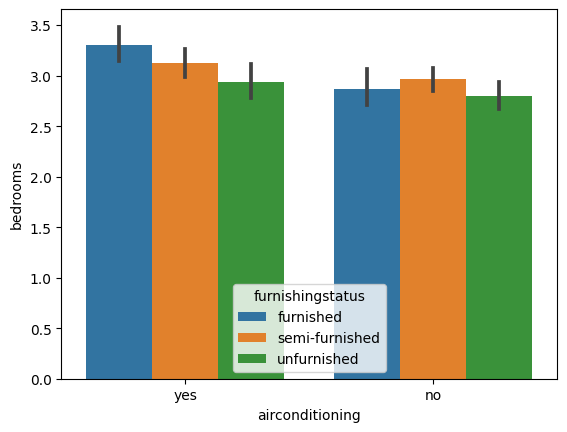

In [11]:
sns.barplot(x=df['airconditioning'],y=df['bedrooms'],hue=df["furnishingstatus"])

<Axes: xlabel='hotwaterheating', ylabel='bathrooms'>

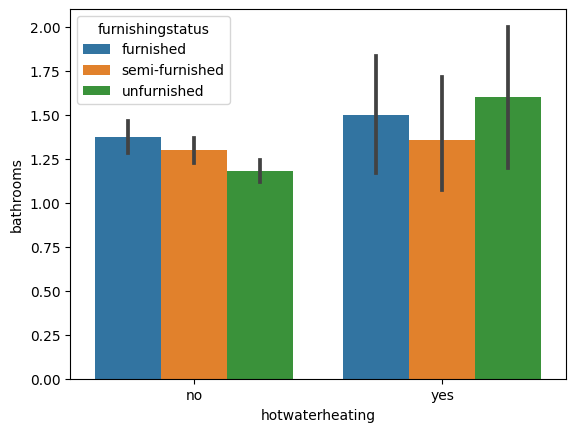

In [12]:
sns.barplot(x=df['hotwaterheating'],y=df['bathrooms'],hue=df["furnishingstatus"])

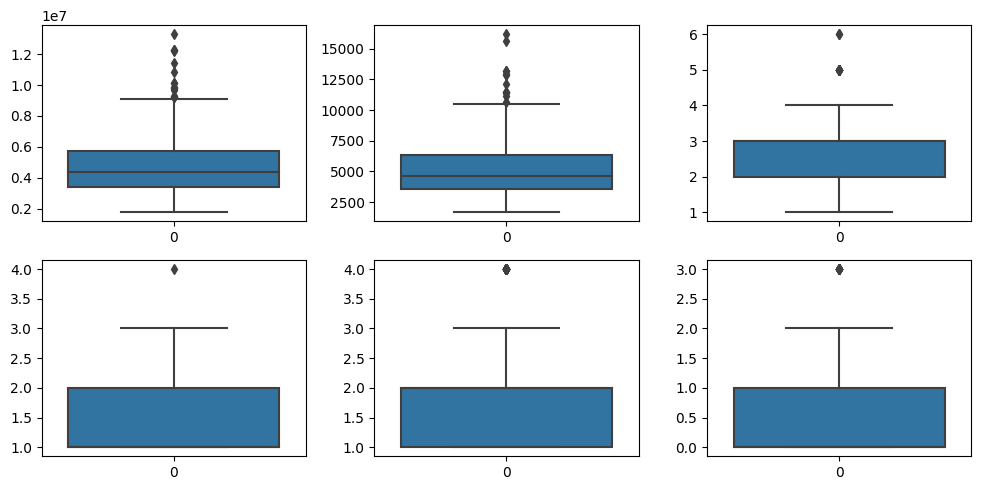

In [13]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

{'whiskers': [<matplotlib.lines.Line2D at 0x197108ce750>,
 'caps': [<matplotlib.lines.Line2D at 0x197108b7dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x197108cdf10>],
 'medians': [<matplotlib.lines.Line2D at 0x197108dcbd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1971089e690>],
 'means': []}

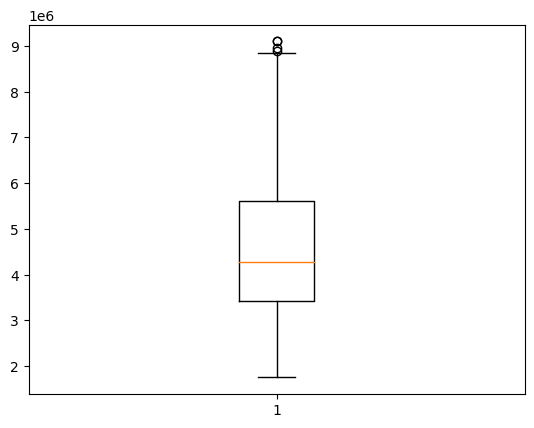

In [14]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

plt.boxplot(df.price)

<Axes: xlabel='furnishingstatus', ylabel='price'>

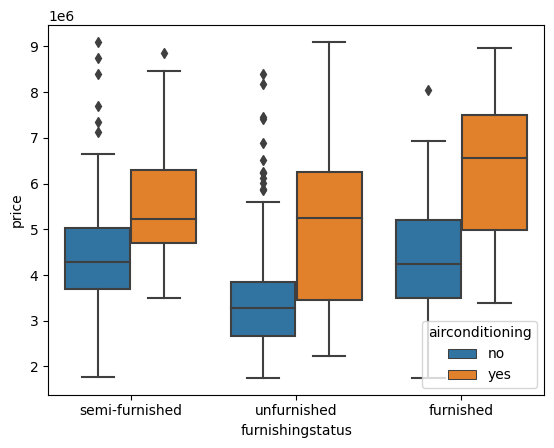

In [15]:
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)

C:\Users\hp\AppData\Local\Temp\ipykernel_15052\3919131488.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='viridis',annot=True)


<Axes: >

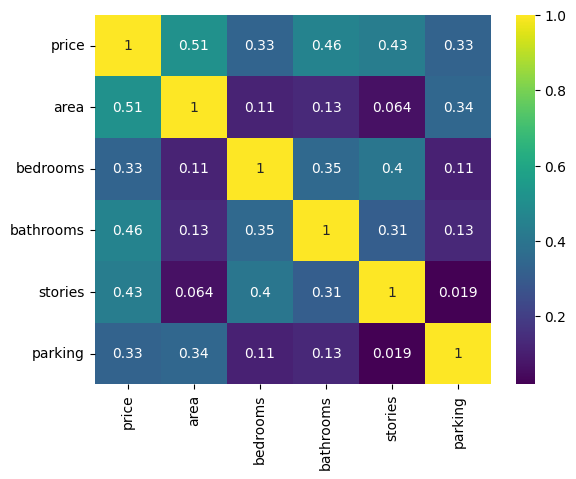

In [16]:
sns.heatmap(df.corr(), cmap='viridis',annot=True)

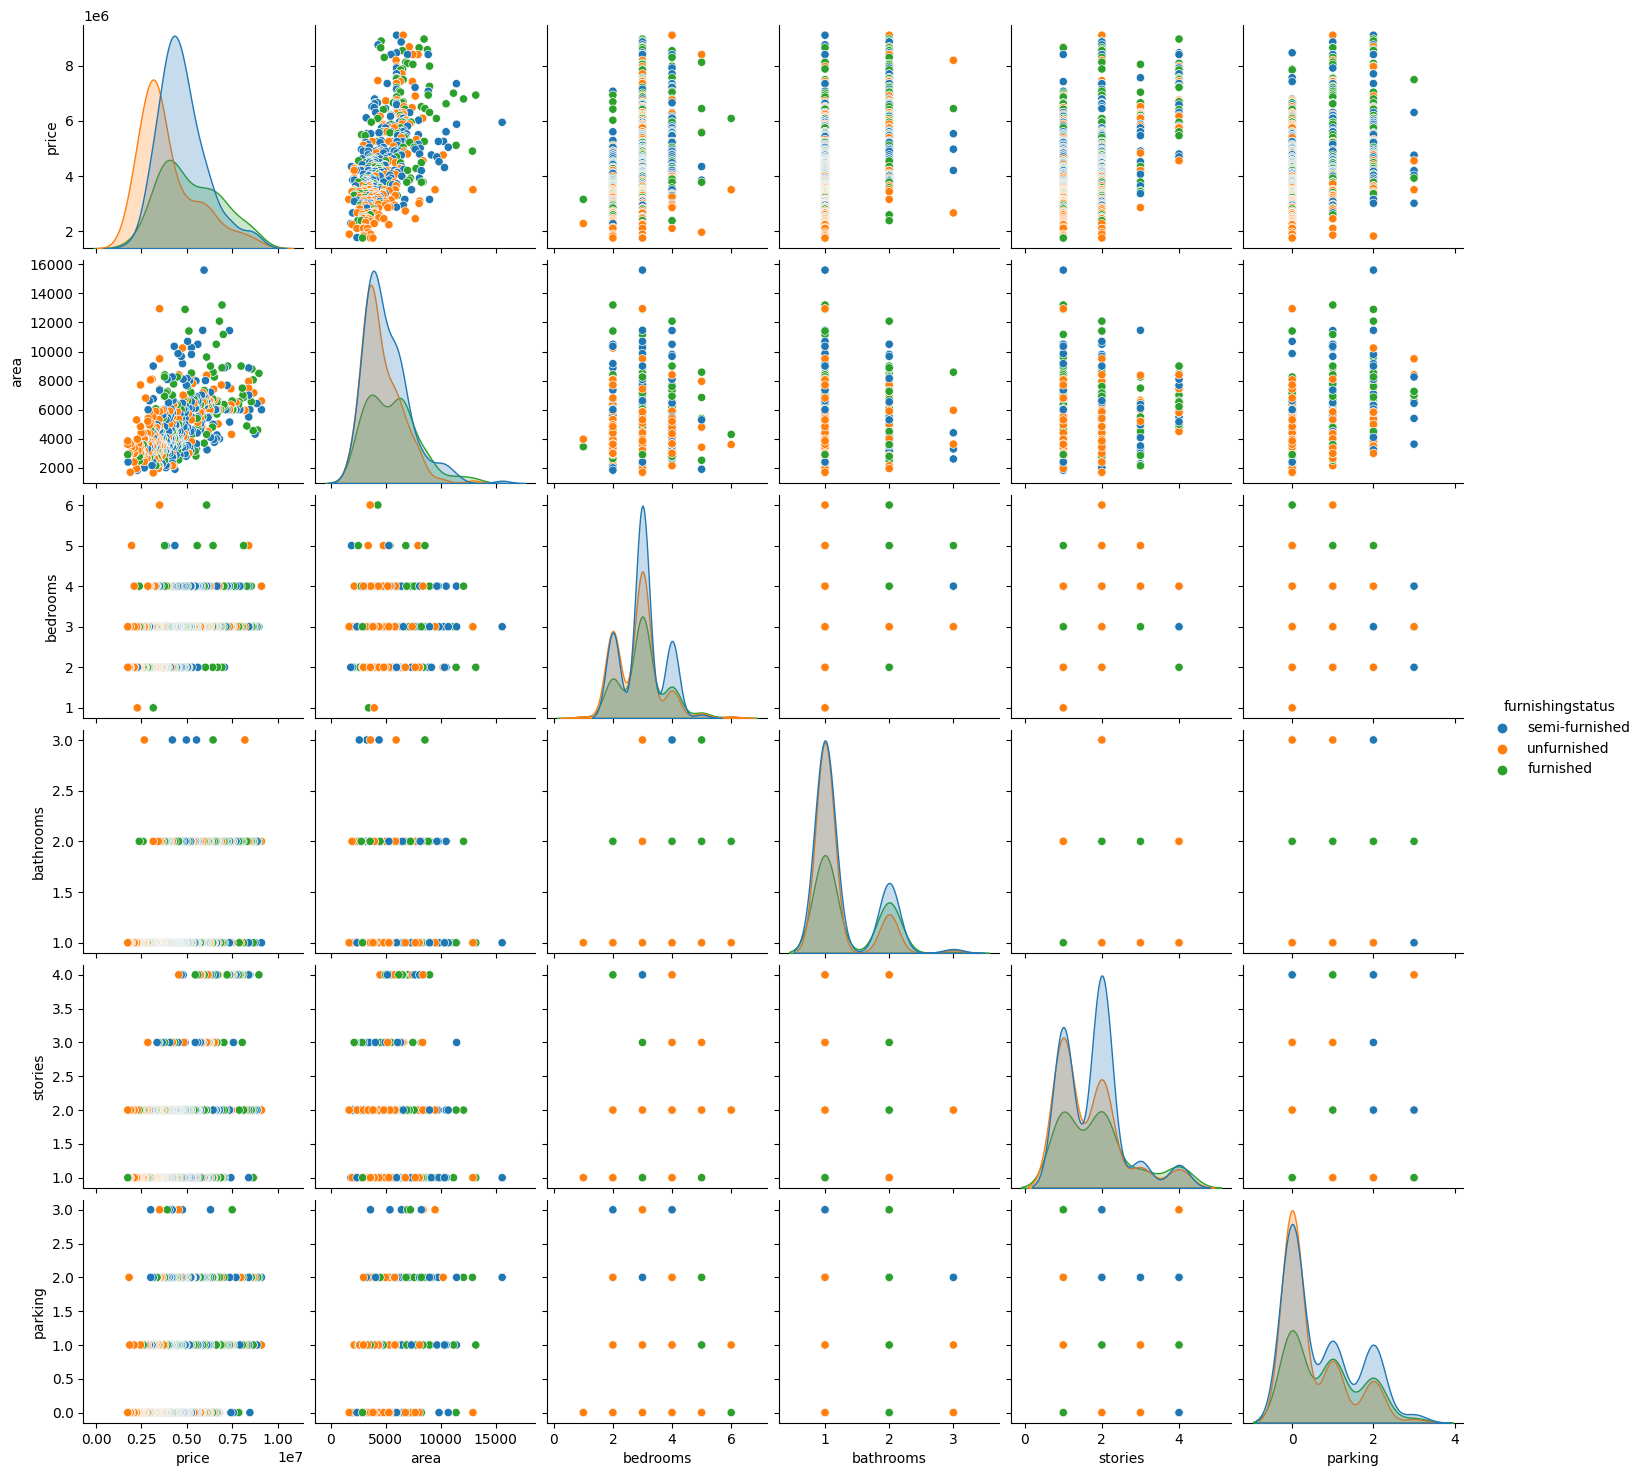

In [17]:
sns.pairplot(df,hue="furnishingstatus")

In [18]:
status = pd.get_dummies(data[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True)
data = pd.concat([data, status], axis = 1)
data.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)

data.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,0,0,1,0,0,0,1,1
1,12250000,8960,4,4,4,3,0,0,1,0,0,0,1,0
2,12250000,9960,3,2,2,2,1,0,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,0,0,1,0,1,0,1,1
4,11410000,7420,4,1,2,2,0,0,1,1,1,0,1,0


In [19]:
X = data.drop(['price'],axis=1)
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [20]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
model = {
    'Random Forest Regressor' : RandomForestRegressor()}

In [29]:
pred ={}


for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pred[name]=y_pred

AttributeError: 'RandomForestRegressor' object has no attribute 'items'

In [28]:
acc= {} 
for name, y_pred in pred.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc[name] = r2
    print(f"Results for {name} : ")
    print (f"Mean Square Erroe : {mse}")
    print(f"R2 Score : {r2}")
    plt.figure(figsize=(15, 6))

Results for Random Forest Regressor : 
Mean Square Erroe : 1782275048282.7012
R2 Score : 0.5861325735291607


<Figure size 1500x600 with 0 Axes>